In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Dependencies

In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [ ]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import shutil
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Preparing Dataset

In [ ]:
DATA_DIR ='/content/drive/MyDrive/bangk2/cucumber_diseases/RESIZED_Cucumber_disease/'

TRAIN_DIR = '/content/drive/MyDrive/bangk2/cucumber/train'
VALIDATION_DIR = '/content/drive/MyDrive/bangk2/cucumber/valid'
TEST_DIR = '/content/drive/MyDrive/bangk2/cucumber/test'

In [ ]:
BATCH_SIZE = 64
EPOCH_NUM = 50

In [ ]:
cucumber_classes = os.listdir(DATA_DIR)

print("Cucumber Classes:")
for classes in cucumber_classes:
  if os.path.isdir(os.path.join(DATA_DIR, classes)):
    print(classes)

Cucumber Classes:
Belly_Rot
Healthy
Downy_Mildew
Anthracnose
Bacterial_Wilt
Gummy_Stem_Blight



Belly_Rot
Total Images: 654
Resolution of First Image: (224, 224, 3)


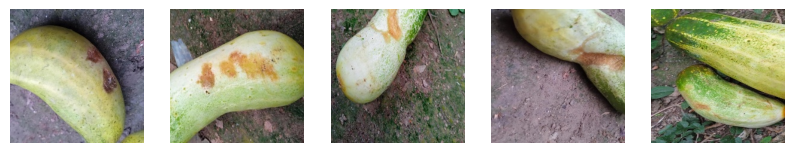


Healthy
Total Images: 594
Resolution of First Image: (224, 224, 3)


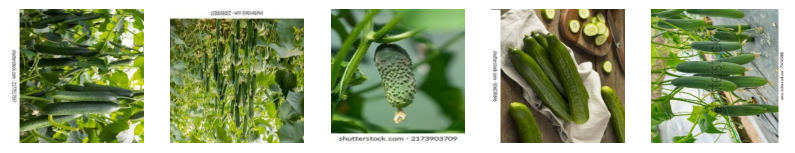


Downy_Mildew
Total Images: 671
Resolution of First Image: (224, 224, 3)


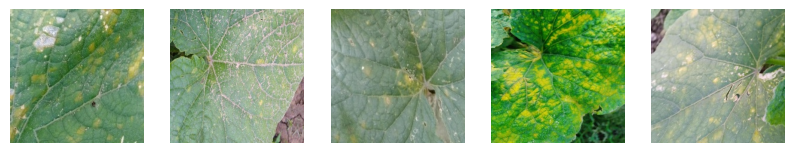


Anthracnose
Total Images: 702
Resolution of First Image: (224, 224, 3)


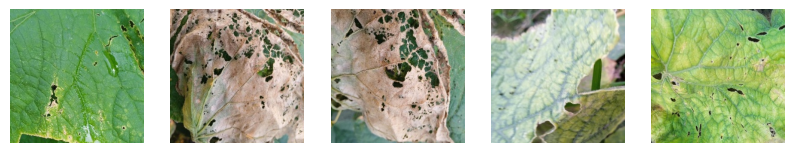


Bacterial_Wilt
Total Images: 944
Resolution of First Image: (224, 224, 3)


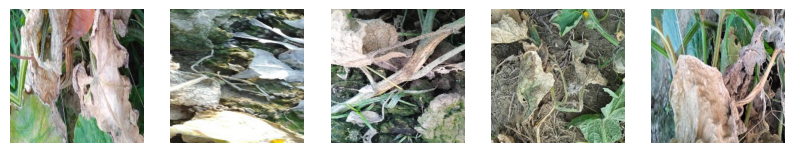


Gummy_Stem_Blight
Total Images: 918
Resolution of First Image: (224, 224, 3)


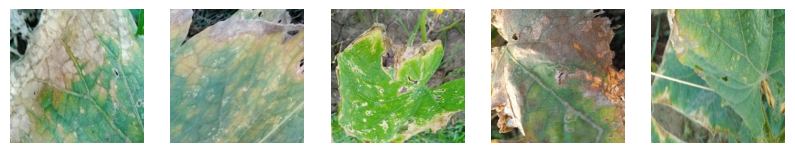

In [ ]:
import random

for item in cucumber_classes:
  print("")
  print(item)
  class_dir = os.path.join(DATA_DIR, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  random_images = random.sample(class_images, 5)

  for i, img_path in enumerate(random_images):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Preprocessing Dataset

In [ ]:
# Split Data into Training, Validation, and Test
class_directories = os.listdir(DATA_DIR)
for class_directory in class_directories:
    class_path = os.path.join(DATA_DIR, class_directory)
    if os.path.isdir(class_path):
        train_class_dir = os.path.join(TRAIN_DIR, class_directory)
        os.makedirs(train_class_dir, exist_ok=True)
        val_class_dir = os.path.join(VALIDATION_DIR, class_directory)
        os.makedirs(val_class_dir, exist_ok=True)
        test_class_dir = os.path.join(TEST_DIR, class_directory)
        os.makedirs(test_class_dir, exist_ok=True)

        class_images = os.listdir(class_path)
        train_images, test_images = train_test_split(class_images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copy(src, dst)

        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_class_dir, image)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copy(src, dst)

In [ ]:
train_image_count = 0
validation_image_count = 0
test_image_count = 0

# Count image in Train Directory
for root, dirs, files in os.walk(TRAIN_DIR):
    train_image_count += len(files)

# Count image in Validation Directory
for root, dirs, files in os.walk(VALIDATION_DIR):
    validation_image_count += len(files)

# Count image in Test Directory
for root, dirs, files in os.walk(TEST_DIR):
    test_image_count += len(files)

# Show Total Image in Directory
print(f"Total Train Images: {train_image_count} images")
print(f"Total Validation Images: {validation_image_count} images")
print(f"Total Test Images: {test_image_count} images")

Total Train Images: 3134 images
Total Validation Images: 673 images
Total Test Images: 676 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input

# Image Data Generator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Train Generator
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

# Validation Generator
validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 3134 images belonging to 6 classes.
Found 673 images belonging to 6 classes.


# Building Model

In [ ]:
from tensorflow.keras.applications import MobileNet


# Freeze the base layers
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in mobilenet_base.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    mobilenet_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

17225924/17225924 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                         

In [ ]:
# Total number of images across all classes
image_counts = [654, 594, 671, 702, 944, 918]

# Calculate class weights
class_weights = {i: train_image_count / count for i, count in enumerate(image_counts)}
class_weights


{0: 4.792048929663609,
 1: 5.276094276094276,
 2: 4.670640834575261,
 3: 4.464387464387465,
 4: 3.319915254237288,
 5: 3.4139433551198257}

## Training Model

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(
    patience=8,
    restore_best_weights=True
)

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train Model with callbacks
history = model.fit(
    train_generator,
    epochs=EPOCH_NUM,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/50
49/49 [==============================] - 79s 1s/step - loss: 3.0336 - accuracy: 0.7246 - val_loss: 0.4607 - val_accuracy: 0.8306
Epoch 2/50
49/49 [==============================] - 73s 1s/step - loss: 1.7668 - accuracy: 0.8398 - val_loss: 0.4124 - val_accuracy: 0.8380
Epoch 3/50
49/49 [==============================] - 65s 1s/step - loss: 1.3758 - accuracy: 0.8740 - val_loss: 0.3110 - val_accuracy: 0.8782
Epoch 4/50
49/49 [==============================] - 64s 1s/step - loss: 1.2286 - accuracy: 0.8896 - val_loss: 0.3067 - val_accuracy: 0.8841
Epoch 5/50
49/49 [==============================] - 65s 1s/step - loss: 1.1797 - accuracy: 0.8931 - val_loss: 0.3080 - val_accuracy: 0.8915
Epoch 6/50
49/49 [==============================] - 63s 1s/step - loss: 1.2744 - accuracy: 0.8867 - val_loss: 0.2739 - val_accuracy: 0.9108
Epoch 7/50
49/49 [==============================] - 61s 1s/step - loss: 1.0554 - accuracy: 0.9046 - val_loss: 0.2330 - val_accuracy: 0.9153
Epoch 8/50
49/49 [==

## Visualization of Accuracy and Loss & Confusion Matrix

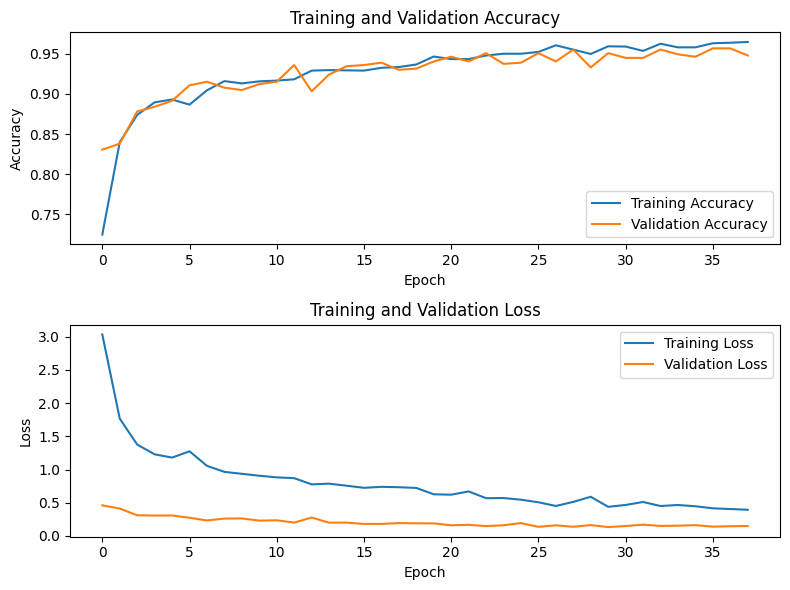

In [ ]:
# Plotting Accuracy and Loss
plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

# Evaluate the Model on Test Set
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 676 images belonging to 6 classes.
11/11 [==============================] - 5s 461ms/step - loss: 0.1820 - accuracy: 0.9349
Test Loss: 0.18196049332618713
Test Accuracy: 0.9349112510681152


11/11 [==============================] - 4s 326ms/step


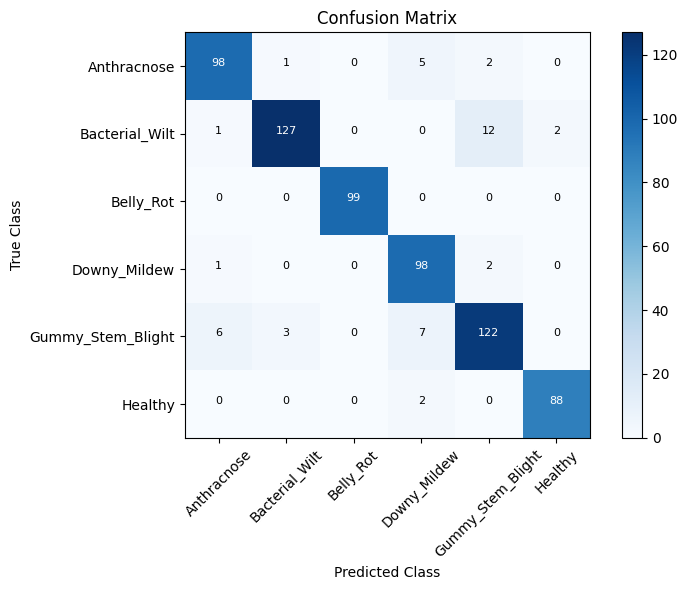

In [ ]:
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)

plt.tight_layout()

# Showing Plot Confusion Matrix
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Classification Report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices)

# Showing Classification Report
print('Classification Report:')
print(cr)

Classification Report:
                   precision    recall  f1-score   support

      Anthracnose       0.92      0.92      0.92       106
   Bacterial_Wilt       0.97      0.89      0.93       142
        Belly_Rot       1.00      1.00      1.00        99
     Downy_Mildew       0.88      0.97      0.92       101
Gummy_Stem_Blight       0.88      0.88      0.88       138
          Healthy       0.98      0.98      0.98        90

         accuracy                           0.93       676
        macro avg       0.94      0.94      0.94       676
     weighted avg       0.94      0.93      0.93       676



## Saving Model

In [ ]:
from google.colab import files


model.save("cucumber_model_bft.h5")
model.save('cucumber_model.keras')
tf.keras.models.save_model(model, 'cucumber_model_bft.hdf5')

model_file_path = "cucumber_model_bft.h5"
files.download(model_file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-18-8d83d6d2d10a>:6: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'cucumber_model_bft.hdf5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>